This notebook uses a random sample of Hull postcodes to show how collecting this data from visitors to Hull museums can provide insight into from where people visit.
Graphs can clearly show any gaps for particular postcode areas and these areas could be targeted with advertising or with outreach activities to encourage people from these areas to visit.

In [40]:
# Import modules needed
import pandas as pd
from matplotlib import pyplot as plt

In [41]:
# Create the pandas dataframe and store the postcodes in a list
visitor_postcodes_df = pd.read_csv('visitor_postcodes.csv')
print(visitor_postcodes_df.head())
visitor_postcodes = list(visitor_postcodes_df['postcode'])
print(visitor_postcodes[0])

   index postcode
0      0  HU6 7SF
1      1  HU6 7JJ
2      2  HU3 5DD
3      3  HU2 0PS
4      4  HU3 6LY
HU6 7SF


First let's make a chart that plots the number of visitors form the different first halves of the visitor postcodes. E.g. HU1, HU2, HU3, ... up to HUxx.
Let's see which postcode first halves we have in our data

In [42]:
# Get all the different first halves of the postcodes from our data
postcode_first_halves = []
for i in range(len(visitor_postcodes)):
    first_half = visitor_postcodes[i].split(' ')[0]    
    if first_half in postcode_first_halves:
        continue
    else:
        postcode_first_halves.append(first_half)
postcode_first_halves.sort()
print(postcode_first_halves)

    

['HU1', 'HU11', 'HU12', 'HU13', 'HU17', 'HU18', 'HU2', 'HU3', 'HU4', 'HU5', 'HU6', 'HU7', 'HU8', 'HU9']


Using this list we can create a pie chart which will show the composition of the visitors' postcodes.

In [43]:
# Create a list to store the counts
counts = [0]*len(postcode_first_halves)
# A method to loop through the visitor postcodes and add to the counts for each first half when we find a match
def count_postcodes(postcode_first_half_list):
    for postcode in postcodes:
        for i in range(len(postcode_first_half_list)):
            if postcode_first_half_list[i] in postcode:
                counts[i] += 1
count_postcodes(postcode_first_halves)
print(counts)

[33, 4, 1, 1, 4, 1, 8, 37, 15, 26, 29, 30, 27, 46]


(-1.1026238544904758,
 1.1001249454519275,
 -1.105961912659533,
 1.1113700186039184)

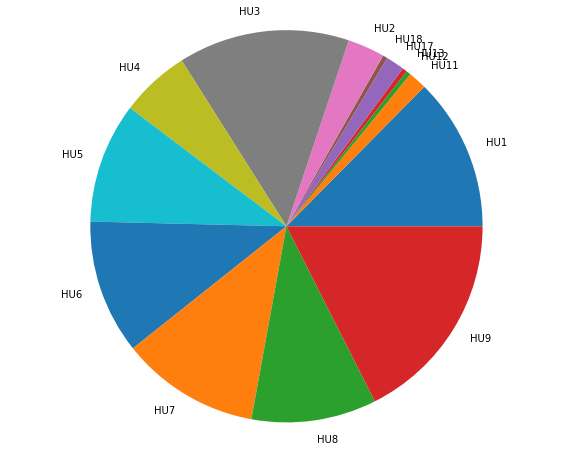

In [44]:
plt.figure(figsize=(10,8))
plt.pie(counts, labels=postcode_first_halves)
plt.axis('equal')

From this we can see that some postcodes, such as HU9, HU1 and HU3 make up a large proportion of the visitors to Hull museums. Some such as HU18 and HU17 only make up a very small proportion.
However, This isn't all the postcodes that exist in the area and some might not have been included in our sample. Since we want to find out where the fewest visitors come from, it would be useful to show these on our graph.
The full list goes from HU1 through to HU20 with no gaps in the numbers. The map below shows which area each postcode covers.


![Image of Postcodes in Hull](https://www.gbmaps.com/4-digit-postcode-maps/hu-hull-postcode-district-map.gif)

In [45]:
postcode_first_half_all = ['HU1', 'HU2', 'HU3', 'HU4', 'HU5', 'HU6', 'HU7', 'HU8', 'HU9', 'HU10', 'HU11', 'HU12', 'HU13', 'HU14', 'HU15','HU16', 'HU17', 'HU18', 'HU19', 'HU20']

To create a bar graph we need to count how many times each of these postcode beginnings appears in our data. 

In [46]:
# Create a list to store the postcode counts
counts =[0]*len(postcode_first_half_all)

# Loop through the data and add to the counts when we find a match
count_postcodes(postcode_first_half_all)
            
print(counts)
    

[33, 8, 37, 15, 26, 29, 30, 27, 46, 0, 4, 1, 1, 0, 1, 1, 4, 1, 0, 1]


We now have the basic data to create a bar chart.

Text(0.5, 1.0, 'A bar chart to show the number of visitors from each of the Hull postcode areas.')

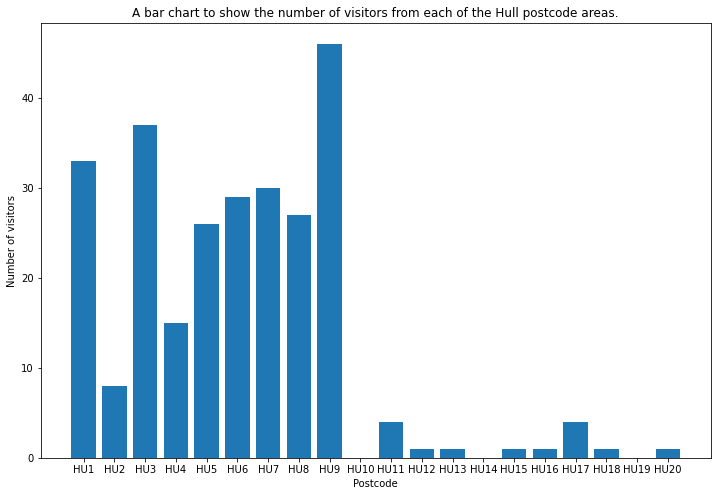

In [47]:
# Plot the data from the lists
fig = plt.figure(figsize=(12,8))
plt.bar(postcode_first_half_all, counts)
plt.xlabel('Postcode')
plt.ylabel('Number of visitors')
plt.title('A bar chart to show the number of visitors from each of the Hull postcode areas.')



Using the bar chart and the map above we can see that most of the visitors in our imaginary sample come from the areas nearest to the city centre. The exception to this is HU2, which is close to the city centre but provides few visitors. Looking at the map, though, we can see that it is a small area and could perhaps be a primarily commercial or industrial area.
However it is clear that the more rural areas outside the city borders are poorly represented and could be targeted with promotional material and outreach activities.
If this were a real sample of postcode data it would be interesting to compare this data for different times of day of for different times of the year. How would the makeup of visitors differ, for example, between a weekday or a weekend?